"""
# IMDB Sentiment Analysis Dataset

The dataset used in this project is the **IMDB Movie Reviews Dataset**, which contains **50,000 movie reviews** labeled as **positive (pos) or negative (neg)**. It is commonly used for sentiment analysis tasks.

## 📌 Dataset Details:
- **Source:** Stanford AI Lab
- **Size:** 50,000 reviews (25,000 for training, 25,000 for testing)
- **Labels:** 
  - **pos** → Positive Sentiment
  - **neg** → Negative Sentiment
- **Format:** Text files organized in "pos" and "neg" subdirectories

## 📥 Download Dataset:
You can download the dataset from the following link:

🔗 [IMDB Dataset from Stanford](https://ai.stanford.edu/~amaas/data/sentiment/)

## 📂 Dataset Structure:

In this project, we opted for **TF-IDF** (Term Frequency-Inverse Document Frequency) over the traditional **Bag-of-Words (BoW)** approach for several important reasons:

1. **Word Importance**  
   - **BoW:** Simply counts the frequency of each word in the document without any weighting.
   - **TF-IDF:** Weighs each word by its importance—words that occur frequently in a document but rarely across all documents are given higher weights. This helps emphasize words that are more meaningful to the context.

2. **Handling Common Words**  
   - **BoW:** Treats all words equally, which means common stopwords (like "the", "and", "is") can dominate the representation.
   - **TF-IDF:** Downweights these common words, reducing noise and ensuring that more significant words have a greater impact on the feature representation.

3. **Better Differentiation for Classification**  
   - **BoW:** Provides a basic count of words, which may not capture the nuances necessary for tasks like sentiment analysis.
   - **TF-IDF:** Enhances model performance by distinguishing documents based on the relative importance of words, thereby improving the accuracy of classification models.

4. **Dimensionality and Sparsity**  
   - **BoW:** Often results in a high-dimensional, sparse matrix where every word in the vocabulary is a feature.
   - **TF-IDF:** Helps in reducing the impact of high-dimensionality by prioritizing unique and informative words, which can lead to a more compact and discriminative feature set.

5. **Improved Classification Performance**  
   - By providing a more meaningful representation of the text, **TF-IDF** generally leads to better performance in tasks such as sentiment analysis, where capturing the subtle differences in word usage is crucial.

In summary, **TF-IDF** is preferred over **Bag-of-Words** because it not only captures the frequency of words but also their relevance within the context of the entire dataset, leading to more effective and accurate text classification.
"""

# Sentiment Analysis Pipeline Documentation

This documentation explains a sentiment analysis pipeline that reads raw text reviews from two directories, processes and cleans the text, visualizes word frequencies, extracts features using TF-IDF, trains and evaluates several classifiers, and finally tunes key hyperparameters for select models.

---

## 1. Data Loading

### Purpose
The `load_data` function is designed to load text reviews from a given folder. The folder is expected to have two subdirectories: one for positive reviews (`pos`) and one for negative reviews (`neg`).

### Process
- **Directory Looping:**  
  The function loops over each label directory (`"pos"` and `"neg"`).

- **File Reading:**  
  For each file within these directories, it reads the file content as a string.

- **Data Construction:**  
  A dictionary is constructed for each file with two keys:
  - `"text"`: The review text.
  - `"label"`: Either `"pos"` or `"neg"`.

- **DataFrame Creation:**  
  All dictionaries are collected into a list and then converted into a Pandas DataFrame.

- **Data Verification:**  
  The first few rows of the DataFrame are printed to verify that the data is loaded correctly.

---

## 2.Visualization


### Word Cloud Generation (Raw Reviews)
- **Word Cloud Creation:**  
  The `WordCloud` class is used to generate an image where word sizes correspond to their frequency in the combined text.

- **Visualization:**  
  Matplotlib is used to display the generated word cloud, providing an initial visualization of word frequencies in the raw reviews.

---

## 3. Text Preprocessing

### Function: `preprocess_text`
This function cleans the raw review text through the following steps:

- **Lowercasing:**  
  Converts all text to lowercase.

- **HTML Tag Removal:**  
  Strips out HTML tags using a regular expression.

- **URL Removal:**  
  Eliminates URLs by matching typical URL patterns.

- **Punctuation Removal:**  
  Removes punctuation using Python’s string translation methods.

- **Number Removal:**  
  Removes numerical digits from the text.

- **Stopword Removal:**  
  Splits the text into words and removes those found in the English stopwords list.

- **Whitespace Normalization:**  
  Reduces multiple spaces to a single space.

### Application
- The function is applied to the original review text.
- The cleaned version is stored in a new DataFrame column called `"processed_review"`.

### Word Cloud Generation (Processed Reviews)
- A second word cloud is generated from the processed reviews, offering a visualization of the most prominent terms after cleaning.

---

## 4. Feature Extraction with TF-IDF

### TF-IDF Vectorization
- **Conversion Process:**  
  `TfidfVectorizer` from scikit-learn is used to convert the processed text into a numerical feature matrix.
  
- **Stopword Exclusion:**  
  Common English stopwords are excluded during vectorization.

- **Feature Limitation:**  
  The maximum number of features is limited to 5000.

- **DataFrame Transformation:**  
  The resulting TF-IDF matrix is transformed into a DataFrame for easier inspection.

### Vocabulary Inspection
- The feature names (i.e., words retained in the TF-IDF model) are printed, showing the terms that constitute the feature space.

### TF-IDF Analysis
- **Mean Calculation:**  
  The mean TF-IDF score for each term across all documents is computed.

- **Sorting & Printing:**  
  Terms are sorted by their average TF-IDF score and the top words are printed.

- **Visualization:**  
  A bar chart is generated to visualize the top 10 words based on their average TF-IDF scores.

---

## 5. Model Training and Evaluation

### Data Splitting
- **Training and Testing Sets:**  
  The dataset is split into training and testing sets using scikit-learn’s `train_test_split`.
  
- **Feature and Label Definition:**  
  - **Features:** The TF-IDF vectors.
  - **Labels:** Derived from the `"label"` column.

### Defined Classification Models
Three classifiers are defined:

- **Logistic Regression:**  
  Configured with a specific regularization strength (`C`) and solver.

- **Naive Bayes:**  
  Specifically, a Multinomial Naive Bayes model is used with a defined smoothing parameter (`alpha`).

- **Support Vector Machine (SVM):**  
  Uses a linear kernel.

### Training & Evaluation
- **Model Training:**  
  Each model is trained on the training set using the TF-IDF features.

- **Prediction and Accuracy:**  
  Predictions are made on the test set, and the accuracy for each model is computed and printed.

- **Results Storage:**  
  The accuracy results for each model are stored in a results dictionary.

---

## 6. Hyperparameter Tuning

### Purpose
To optimize the performance of the classifiers by tuning key hyperparameters.

### Approach
- **Randomized Search:**  
  The script employs `RandomizedSearchCV` to search over a specified range of hyperparameters for:
  - **Logistic Regression:**  
    Tuning the regularization parameter (`C`) over a uniform distribution and trying different solvers (e.g., `"liblinear"` and `"lbfgs"`).
  - **Multinomial Naive Bayes:**  
    Tuning the smoothing parameter (`alpha`).

- **Cross-Validation:**  
  A 5-fold cross-validation is used during the search process.

- **Iteration:**  
  For each model, 5 iterations are performed to sample from the hyperparameter space.

- **Results:**  
  The best estimator and its corresponding hyperparameters are stored in a dictionary and printed out.

---

# Sentiment Analysis - Classification Report

This document presents the **classification reports** for different machine learning models trained on the sentiment analysis dataset. The classification report includes precision, recall, F1-score, and support for both **Negative** and **Positive** sentiment classes.

---

## **1. Logistic Regression**
- **Accuracy:** `88%`
- **Macro Average F1-score:** `0.88`
- **Weighted Average F1-score:** `0.88`

---

## **2. Naive Bayes**
- **Accuracy:** `84%`
- **Macro Average F1-score:** `0.84`
- **Weighted Average F1-score:** `0.84`

---

## **3. Support Vector Machine**
- **Accuracy:** `87%`
- **Macro Average F1-score:** `0.87`
- **Weighted Average F1-score:** `0.87`

---

## **Summary of Model Performance**
| Model                  | Accuracy | Precision | Recall | F1-score |
|------------------------|----------|------------|--------|----------|
| **Logistic Regression** | **88%**  | **0.88**  | **0.88** | **0.88** |
| **Naive Bayes**        | **84%**  | **0.84**  | **0.84** | **0.84** |
| **SVM**                | **87%**  | **0.87**  | **0.87** | **0.87** |

### **Key Observations:**
- **Logistic Regression** achieved the highest accuracy (**88%**) and overall performance.
- **Support Vector Machine (SVM)** performed slightly lower (**87%**), making it another strong contender.
- **Naive Bayes** had the lowest accuracy (**84%**), which may indicate limitations in handling word distributions.

---

## **Conclusion**
- **Logistic Regression** is the best-performing model based on accuracy and F1-score.

In [ ]:

import os
import pandas as pd

def load_data(folder_path):
    data = []
    for label in ["pos", "neg"]:
        path = os.path.join(folder_path, label)
        for file in os.listdir(path):
            file_path = os.path.join(path, file)
            with open(file_path, "r", encoding="utf-8") as f:
                text = f.read().strip()
                data.append({"text": text, "label": label})
    
    return pd.DataFrame(data)

# Set the path to your main folder containing 'pos' and 'neg' directories
folder_path = r"C:\Users\manuh\Desktop\m\aclImdb\train"

# Load data into a DataFrame
df = load_data(folder_path)

# Display first few rows
print(df.head())


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('./imdb.csv')

In [17]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
words = " ".join(df["text"]).split()
words = [word.lower() for word in words if word.lower() not in stop_words]

word_freq = Counter(words).most_common(20)  # Get top 20 words
print(word_freq)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manuh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('/><br', 50935), ('movie', 30887), ('film', 27777), ('one', 22480), ('like', 18779), ('would', 12027), ('even', 12010), ('good', 11926), ('really', 11065), ('see', 10410), ('-', 9355), ('get', 8959), ('story', 8743), ('much', 8739), ('also', 8007), ('first', 7985), ('time', 7945), ('great', 7714), ('people', 7676), ('could', 7594)]


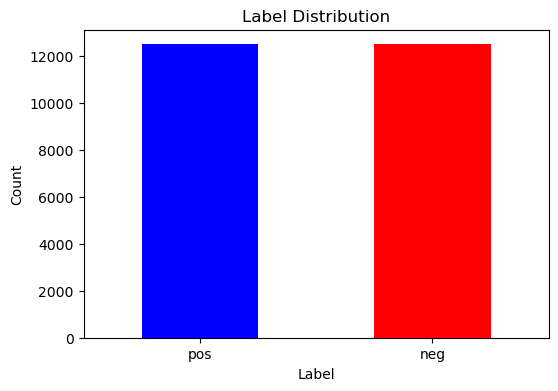

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['blue', 'red'])

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.xticks(rotation=0)

# Show the plot
plt.show()


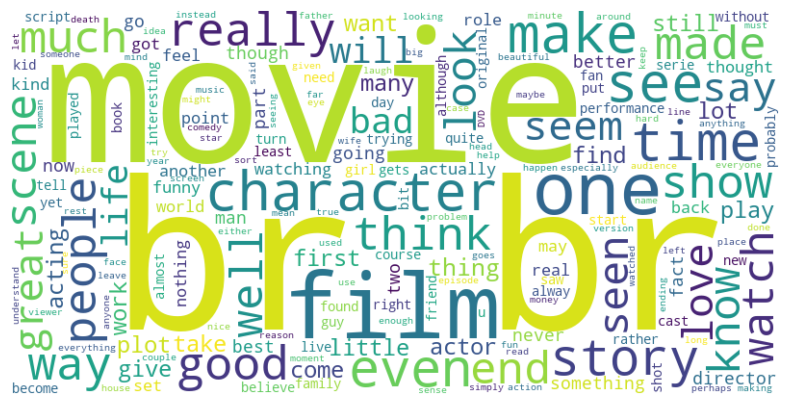

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(df["text"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [21]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

In [22]:
import re
import string
df['processed_review'] = df['text'].apply(preprocess_text)

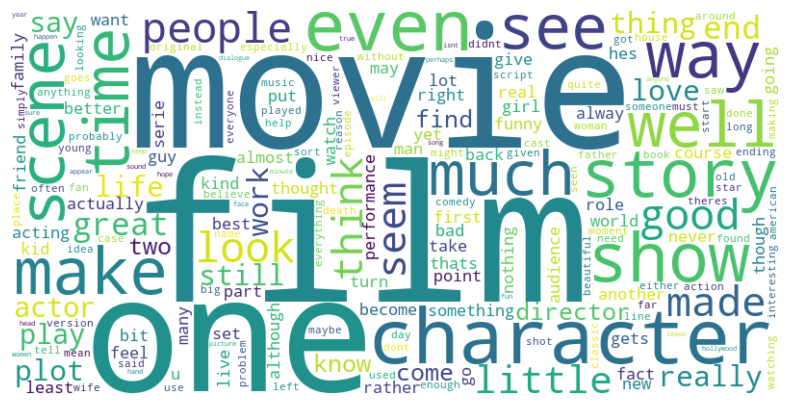

In [23]:
from wordcloud import WordCloud

text = " ".join(df["processed_review"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["processed_review"])
print(vectorizer.get_feature_names_out())

['abandoned' 'abc' 'abilities' ... 'zombie' 'zombies' 'zone']


In [25]:

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display top rows
print(tfidf_df.head())


   abandoned  abc  abilities  ability  able  abraham  abrupt  absence  absent  \
0        0.0  0.0        0.0      0.0   0.0      0.0     0.0      0.0     0.0   
1        0.0  0.0        0.0      0.0   0.0      0.0     0.0      0.0     0.0   
2        0.0  0.0        0.0      0.0   0.0      0.0     0.0      0.0     0.0   
3        0.0  0.0        0.0      0.0   0.0      0.0     0.0      0.0     0.0   
4        0.0  0.0        0.0      0.0   0.0      0.0     0.0      0.0     0.0   

   absolute  ...     young  younger  youngest  youre  youth  youve  zero  \
0       0.0  ...  0.000000      0.0       0.0    0.0    0.0    0.0   0.0   
1       0.0  ...  0.046623      0.0       0.0    0.0    0.0    0.0   0.0   
2       0.0  ...  0.000000      0.0       0.0    0.0    0.0    0.0   0.0   
3       0.0  ...  0.000000      0.0       0.0    0.0    0.0    0.0   0.0   
4       0.0  ...  0.000000      0.0       0.0    0.0    0.0    0.0   0.0   

   zombie  zombies  zone  
0     0.0      0.0   0.0  
1 

In [26]:
tfidf_means = tfidf_df.mean().sort_values(ascending=False)
print("Top words based on average TF-IDF score:\n", tfidf_means)


Top words based on average TF-IDF score:
 movie           0.059412
film            0.049779
like            0.029007
good            0.025564
really          0.021941
                  ...   
voiced          0.000302
ladder          0.000301
accepts         0.000298
championship    0.000243
macarthur       0.000230
Length: 5000, dtype: float64


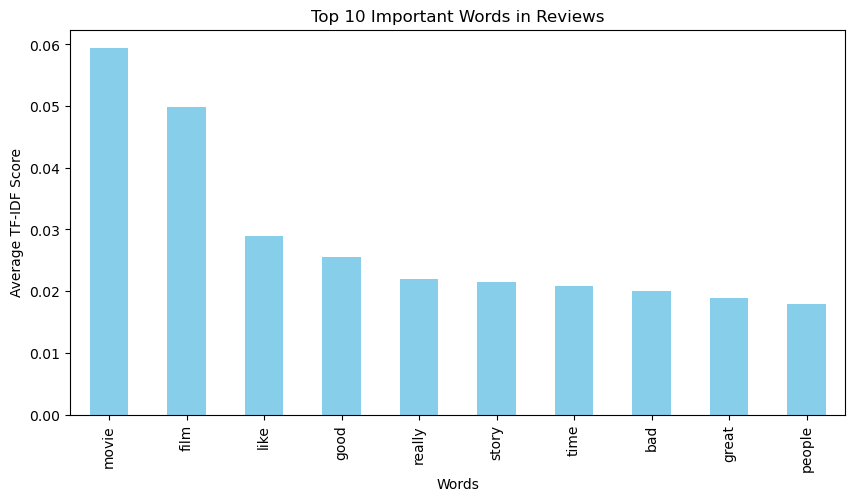

In [27]:
import matplotlib.pyplot as plt

tfidf_means.head(10).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.xlabel("Words")
plt.ylabel("Average TF-IDF Score")
plt.title("Top 10 Important Words in Reviews")
plt.show()



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Define target labels (assuming 'label' column exists: 1 for positive, 0 for negative)
y = df["label"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different classification models
models = {
    "Logistic Regression": LogisticRegression(C= 1.934347898661638,solver='lbfgs'),
    "Naive Bayes": MultinomialNB(alpha= 1.5639878836228103),
    "Support Vector Machine": SVC(kernel='linear')
}
# Dictionary to store results
results = {}

for model_name, model in models.items():
    # Train the model on transformed TF-IDF features
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")



Logistic Regression Accuracy: 0.8794
Naive Bayes Accuracy: 0.8446
Support Vector Machine Accuracy: 0.8728


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import uniform

# Define models and their hyperparameter distributions
param_distributions = {
    "LogisticRegression": {
        "C": uniform(0.1, 10),
        "solver": ["liblinear", "lbfgs"]
    },
    "MultinomialNB": {
        "alpha": uniform(0.1, 2)  # Smoothing parameter
    }
}

# Dictionary to store best models
best_models = {}

for model_name, params in param_distributions.items():
    if model_name == "LogisticRegression":
        model = LogisticRegression()
    elif model_name == "MultinomialNB":
        model = MultinomialNB()

    random_search = RandomizedSearchCV(
        model, 
        param_distributions=params,
        n_iter=5, 
        cv=10, 
        n_jobs=-1, 
        random_state=42
    )

    random_search.fit(X_train, y_train)

    best_models[model_name] = random_search.best_estimator_
    print(f"Best parameters for {model_name}: {random_search.best_params_}")


Best parameters for LogisticRegression: {'C': np.float64(1.934347898661638), 'solver': 'lbfgs'}
Best parameters for MultinomialNB: {'alpha': np.float64(1.5639878836228103)}


In [32]:
from sklearn.metrics import classification_report

# Generate classification reports for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))
    print("=" * 80)  # Separator for readability


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      2485
    Positive       0.87      0.89      0.88      2515

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

    Negative       0.84      0.84      0.84      2485
    Positive       0.84      0.85      0.85      2515

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000

Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

    Negative       0.88      0.86      0.87      2485
    Positive       0.87      0.88      0.87      2515

    accuracy                           0.87

Confusion Matrix for Logistic Regression:



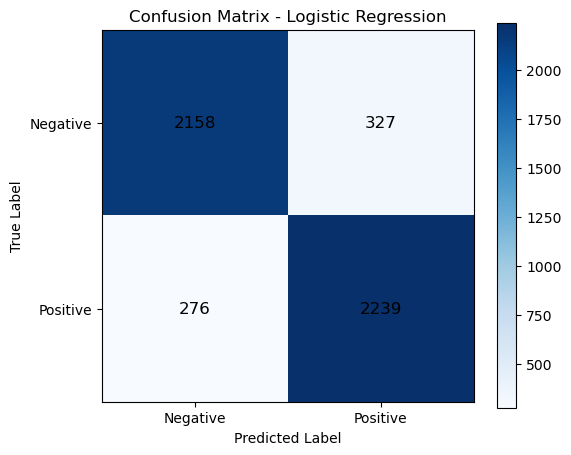

Confusion Matrix for Naive Bayes:



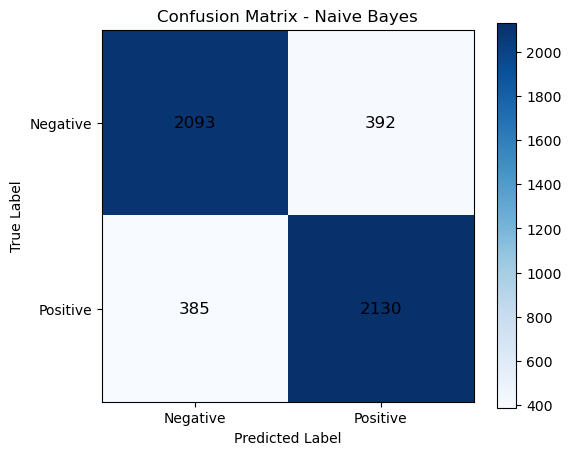

Confusion Matrix for Support Vector Machine:



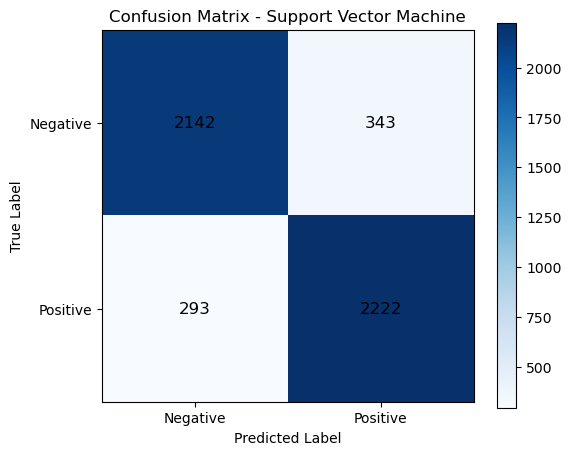

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix using Matplotlib
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.colorbar()

    # Labeling axes
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    classes = ["Negative", "Positive"]
    tick_marks = [0, 1]
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # Displaying values in the matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color="black", fontsize=12)

    plt.show()

# Generate confusion matrices for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Confusion Matrix for {model_name}:\n")
    plot_confusion_matrix(y_test, y_pred, model_name)
